In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans



In [59]:
data_set_conaminantes = pd.read_csv('../../data/processed/Dataset_Particulas_contaminantes.csv',sep=';', thousands=None, decimal=',')
data_set_conaminantes['fecha'] = pd.to_datetime(data_set_conaminantes['fecha'])

Dataset_MinMax = pd.read_csv('../../data/processed/normalizados/Dataset_MinMax.csv',sep=';', thousands=None, decimal=',')
Dataset_MinMax['fecha'] = pd.to_datetime(Dataset_MinMax['fecha'])

In [60]:
fecha = data_set_conaminantes['fecha']
pm10 = data_set_conaminantes['pm10']
pm25= data_set_conaminantes['pm2.5']

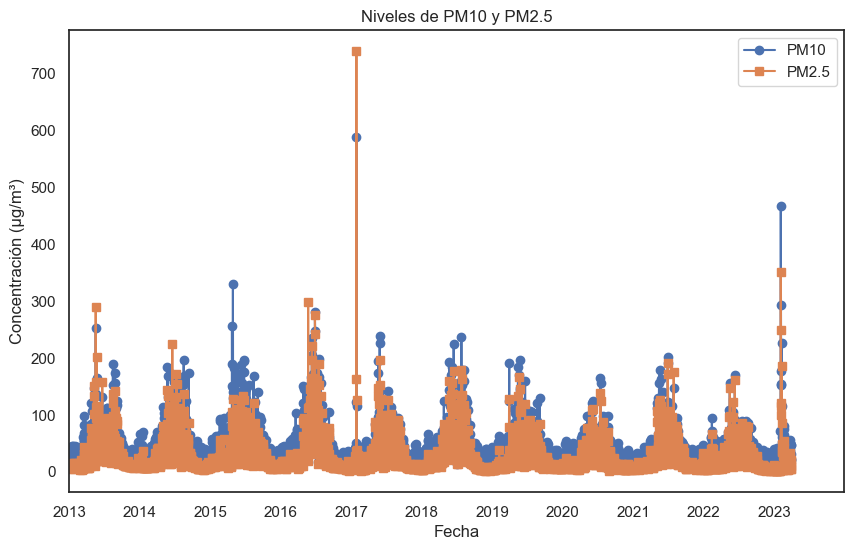

In [61]:
# Graficar los datos
plt.figure(figsize=(10,6))
plt.plot(fecha, pm10, label='PM10', marker='o')
plt.plot(fecha, pm25, label='PM2.5', marker='s')

plt.title('Niveles de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración (µg/m³)')
plt.legend()

# Configurar el formato y la ubicación de las marcas del eje x
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubicar una marca por año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatear las marcas como 'YYYY'

# Establecer los límites del eje x
plt.xlim([pd.Timestamp('2013-01-01'), pd.Timestamp('2023-12-31')])

plt.show()

In [62]:
# Extraer año y mes de la fecha y agregarlas como nuevas columnas
data_set_conaminantes['año'] = data_set_conaminantes['fecha'].dt.year
data_set_conaminantes['mes'] = data_set_conaminantes['fecha'].dt.month_name()

# Agrupar por año y mes, calcular el promedio de 'valor_1' y 'valor_2'
resultados = data_set_conaminantes.groupby(['año', 'mes'])[['pm2.5', 'pm10']].mean().reset_index()

resultados = data_set_conaminantes.groupby(['año', 'mes'])[['pm2.5', 'pm10']].mean().reset_index()



In [63]:
# Configuración de Seaborn
sns.set_theme(style="darkgrid")

# Asegurarte de que 'año' es una cadena para facilitar la trama
resultados['año'] = resultados['año'].astype(str)

# Lista de meses
meses = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

mesesEs = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
           'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Iterar a través de cada mes y crear un gráfico para cada uno
for mesEn, mesEs in zip(meses, mesesEs):
    # Filtrar el DataFrame para solo las filas correspondientes a este mes
    df_mes = resultados[resultados['mes'] == mesEn]
    
    # Crear una nueva figura para este mes
    plt.figure(figsize=(12, 6))
    
    # Utilizar sns.lineplot para los gráficos y aplicar una paleta de colores
    sns.lineplot(x='año', y='pm2.5', data=df_mes, marker='o', label='PM2.5', color='skyblue')
    sns.lineplot(x='año', y='pm10', data=df_mes, marker='o', label='PM10', color='darkorange')
    
    # aspectos visuales
    plt.title(f'Evolución de fuentes contaminantes en {mesEs}', fontsize=16, fontweight='bold')
    plt.legend(title='Fuente Contaminante', title_fontsize='13', fontsize='12')
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Concentración promedio (µg/m³)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Guardar la figura en un archivo
    path = f'./imagenes/promedio_mes_anual/{mesEs}.png'
    plt.savefig(path)
    
    # plt.show()

    # Cerrar la figura para liberar memoria
    plt.close()

data_set_conaminantes = data_set_conaminantes.drop(columns=['año', 'mes'])


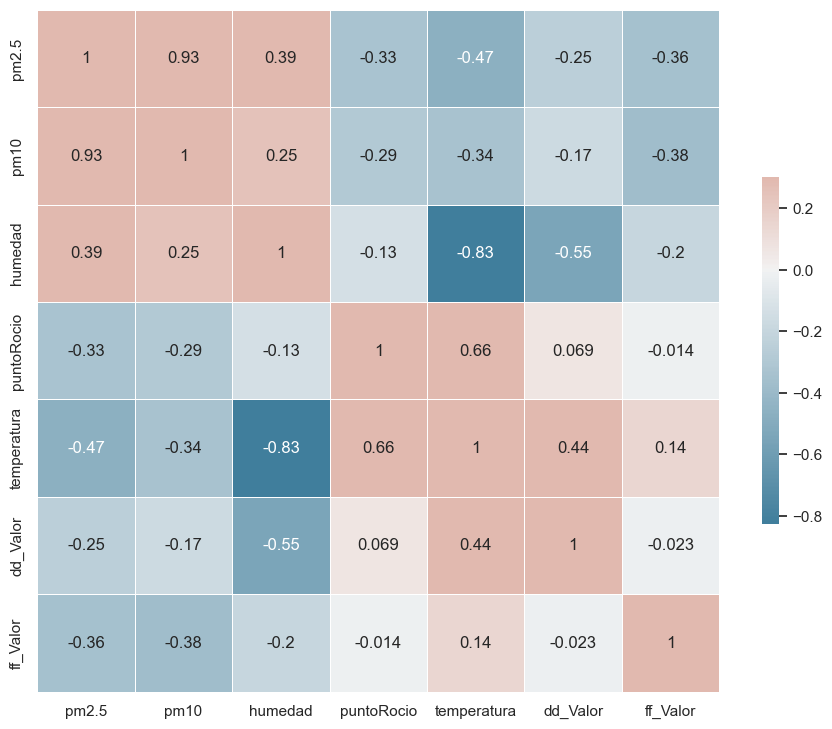

In [65]:
correlation_matrix = data_set_conaminantes.drop(columns=['fecha']).corr()


# Configurar el estilo visual de Seaborn
sns.set(style="white")

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(11, 9))

# Generar una paleta de colores divergentes
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el heatmap
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


# Guardar la figura en un archivo
path = './imagenes/correlacion/dataset_correlation.png'
plt.savefig(path)
# Mostrar la figura
plt.show()